In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

In [66]:
models = ["CAMS", "CTRACKER", "JAMSTEC", "JENA_s76", "JENA_s85", "Rayner"]
times = [
    np.arange(1979,2018,1/12),
    np.arange(2000,2018,1/12),
    np.arange(1996,2018,1/12),
    np.arange(1976,2018,1/12),
    np.arange(1985,2018,1/12),
    np.arange(1992,2013,1/12)
]

land = {}
ocean = {}
for index, model in enumerate(models):
    
    vals = pickle.load(open(f"./../{model}/deseasonalise_land.pik", "rb"))
    filt_vals = pickle.load(open(f"./../{model}/bandpass_10_low_land_deseason.pik", "rb"))
    
    land[model] = {"time": times[index], "vals": vals, "filt_vals": filt_vals}
    
    vals = pickle.load(open(f"./../{model}/deseasonalise_ocean.pik", "rb"))
    filt_vals = pickle.load(open(f"./../{model}/bandpass_10_low_ocean_deseason.pik", "rb"))
    
    ocean[model] = {"time": times[index], "vals": vals, "filt_vals": filt_vals}


In [108]:
def bandpass_plot(sink, model, plot_vals=False):
    
    time = sink[model]["time"]
    vals = sink[model]["vals"]
    filt_vals = sink[model]["filt_vals"]
    
    plt.figure(figsize=(20,10))
    plt.plot(time, filt_vals, color='b')
    
    if plot_vals:
        plt.plot(time, vals, color='c')

def plot_all(sink, values):
    """values: either normal vals (vals) or filtered vals (filt_vals)."""
    
    plt.figure(figsize=(20,10))
    
    for model in sink.keys():
        time = sink[model]["time"]
        vals = sink[model][values]
        
        plt.plot(time, vals)

def linreg(sink, model, values):
    """values: either normal vals (vals) or filtered vals (filt_vals)."""
    
    return stats.linregress(sink[model]["time"], sink[model][values])

def diff_vals_linreg(sink, model, values):
    """values: either normal vals (vals) or filtered vals (filt_vals)."""
    
    stat = stats.linregress(sink[model]["time"], sink[model][values])
    y = sink[model]["time"]*stat[0] + stat[1]
    
    return y - sink[model][values]


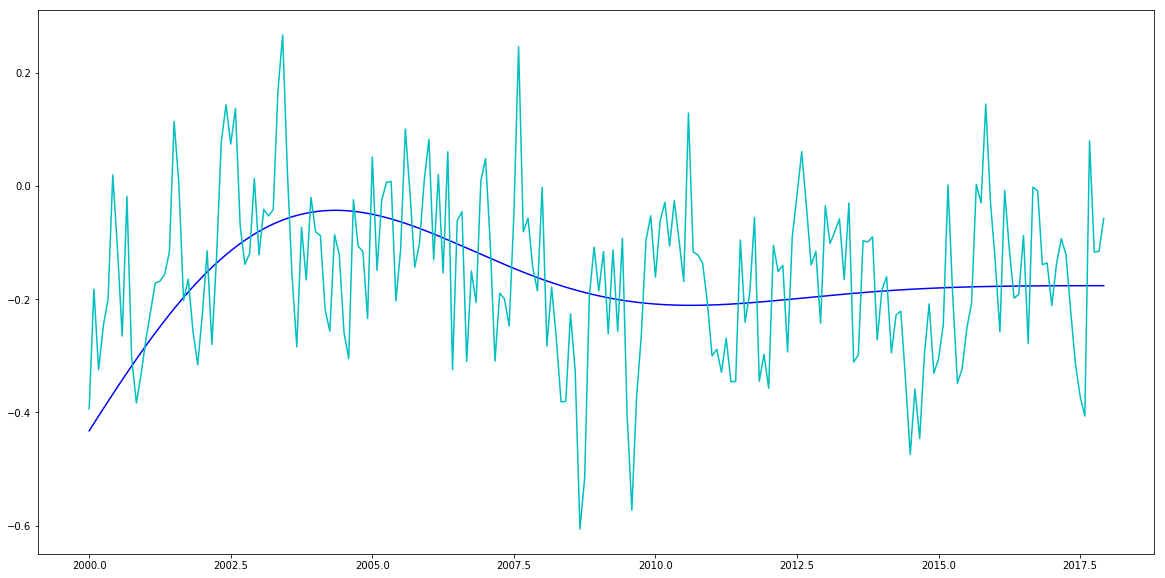

In [109]:
bandpass_plot(land, "CTRACKER", True)

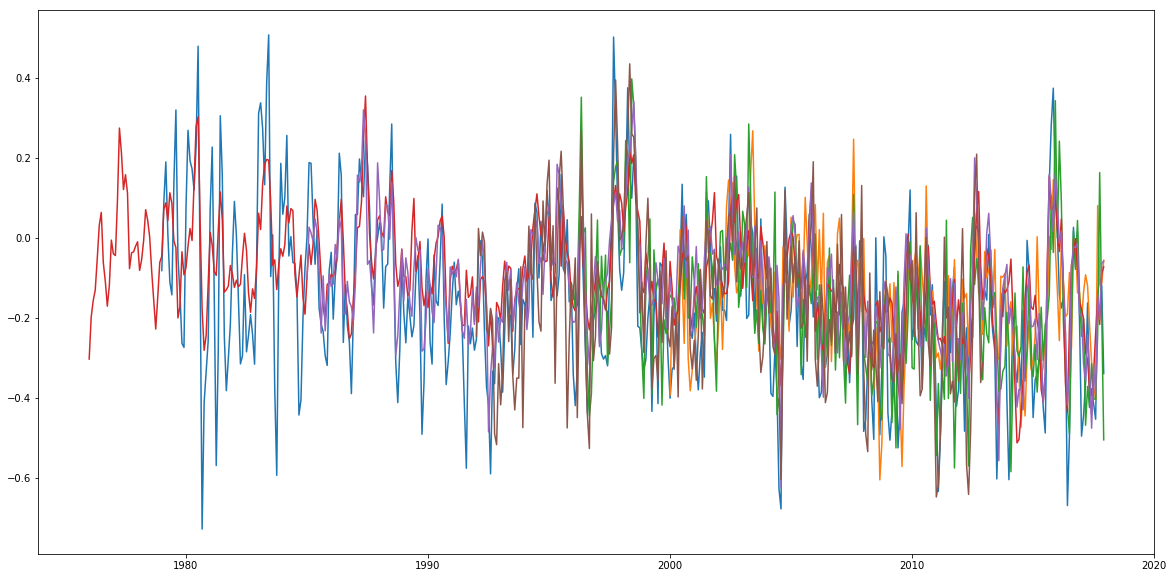

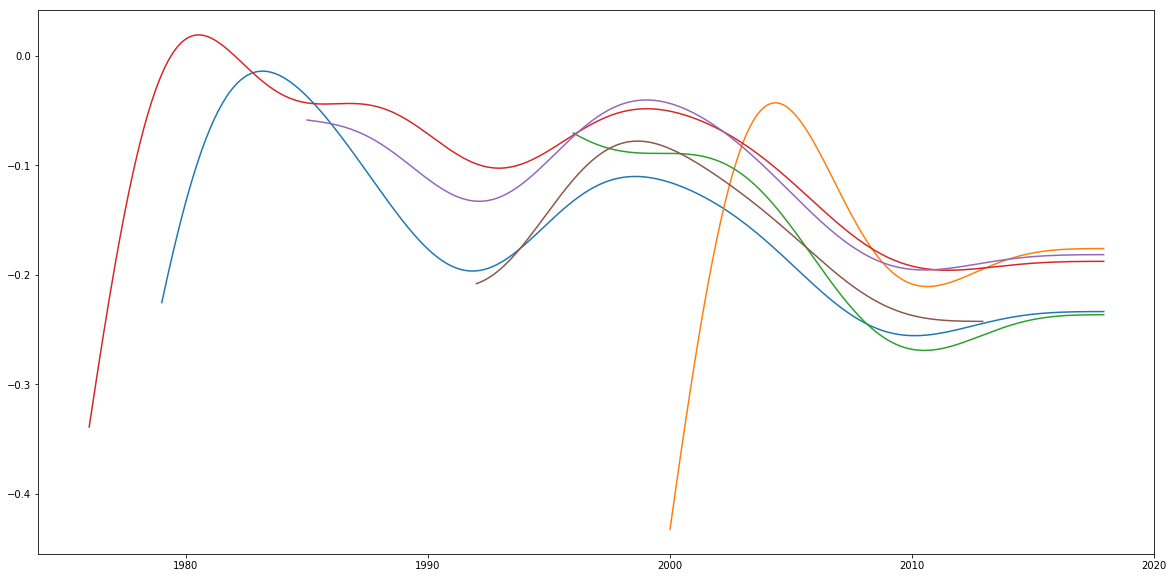

In [110]:
plot_all(land, "vals"), plot_all(land, "filt_vals");

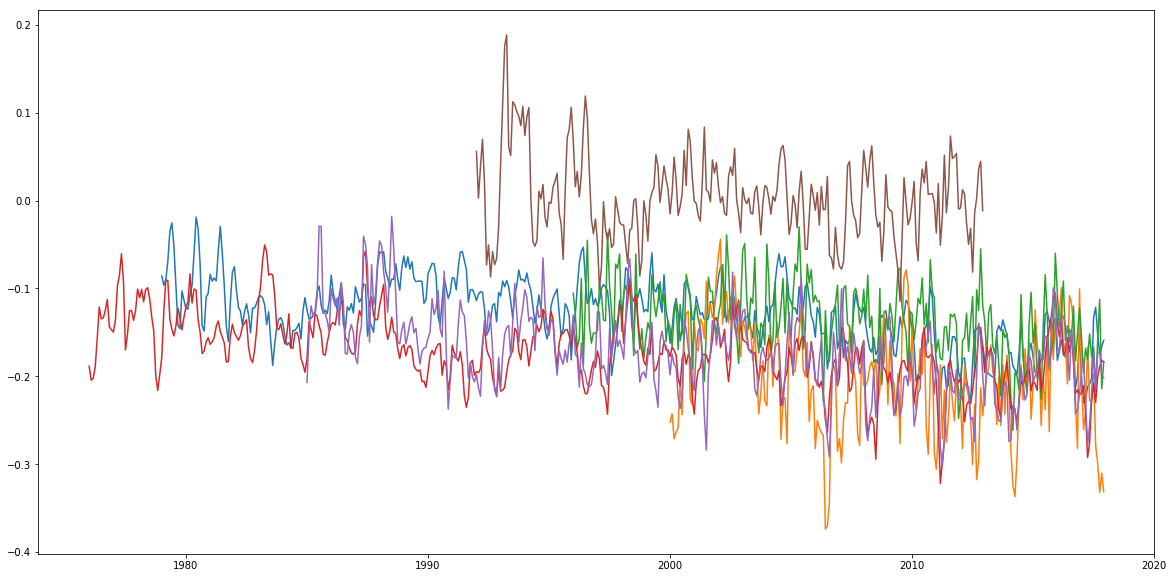

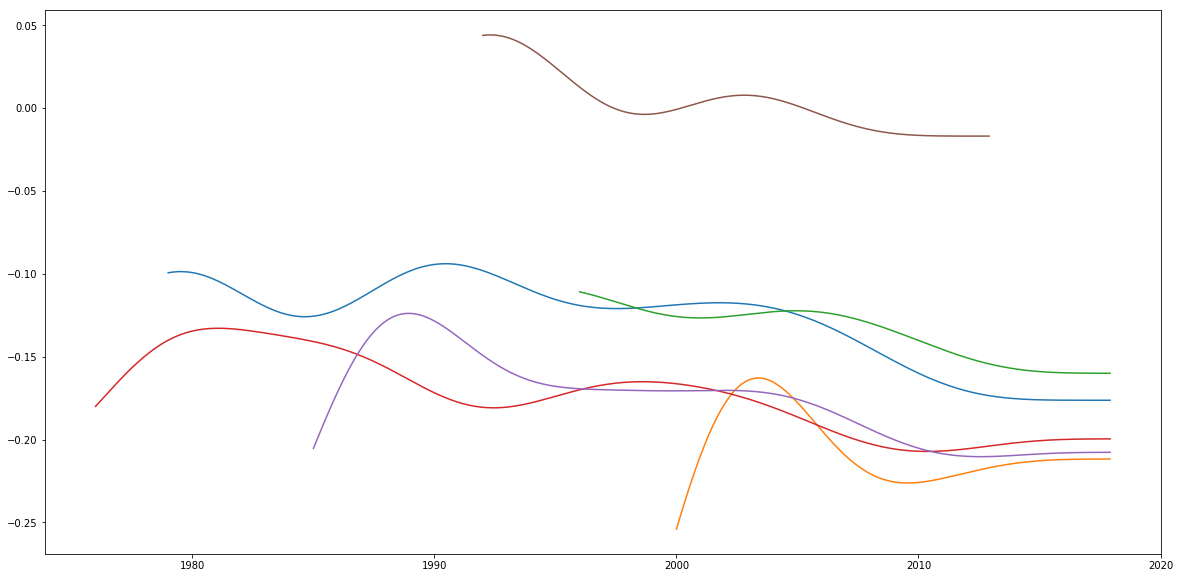

In [111]:
plot_all(ocean, "vals"), plot_all(ocean, "filt_vals");

In [112]:
linreg(land, "CAMS", "filt_vals")

LinregressResult(slope=-0.005010605981448009, intercept=9.852720705312676, rvalue=-0.7933369771316591, pvalue=1.6864067097028954e-102, stderr=0.00017811559154135926)

In [113]:
linreg(land, "JENA_s76", "filt_vals")

LinregressResult(slope=-0.0036378513331191986, intercept=7.163615670153165, rvalue=-0.6304637482939409, pvalue=3.329910643133823e-57, stderr=0.00019990196672793487)

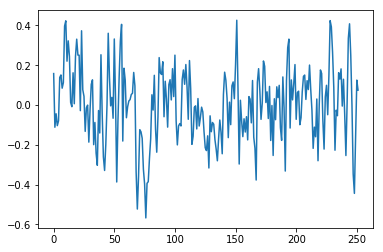

In [138]:
plt.plot(diff_vals_linreg(land, "Rayner", "vals"))